# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sklearn

In [3]:
import seaborn as sns

In [4]:
from scipy import stats

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [10]:
import sklearn.metrics as metrics

# LOADING DATASET

In [11]:
dataset=pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# DATA VISUALISATION

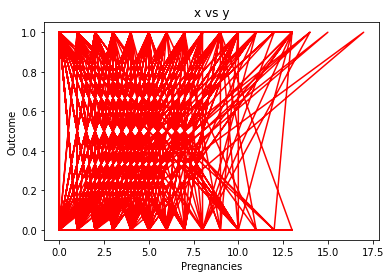

In [13]:
plt.plot(dataset["Pregnancies"],dataset["Outcome"],'r')
plt.xlabel('Pregnancies')
plt.ylabel('Outcome')
plt.title("x vs y")
plt.show()

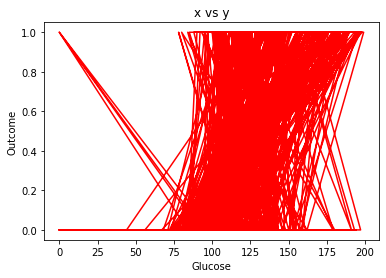

In [14]:
plt.plot(dataset["Glucose"],dataset["Outcome"],'r')
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.title("x vs y")
plt.show()

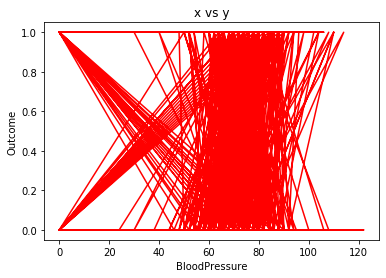

In [15]:
plt.plot(dataset["BloodPressure"],dataset["Outcome"],'r')
plt.xlabel('BloodPressure')
plt.ylabel('Outcome')
plt.title("x vs y")
plt.show()

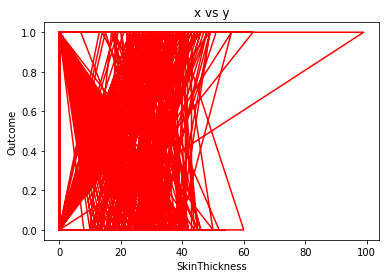

In [16]:
plt.plot(dataset["SkinThickness"],dataset["Outcome"],'r')
plt.xlabel('SkinThickness')
plt.ylabel('Outcome')
plt.title("x vs y")
plt.show()

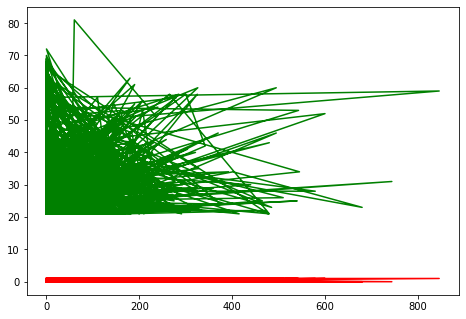

In [17]:
fig=plt.figure()
axes=fig.add_axes([0,0,1,1])#main axes left,bottom,width,height
axes.plot(dataset["Insulin"],dataset["Outcome"],'r')
axes.plot(dataset["Insulin"],dataset["Age"],'g')

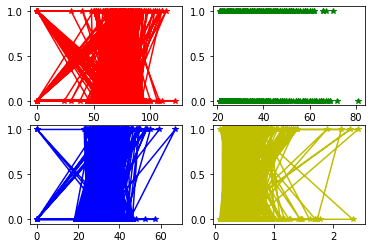

In [18]:
plt.subplot(2,2,1)
plt.plot(dataset["BloodPressure"],dataset["Outcome"],'r',marker='*')
plt.subplot(2,2,2)
plt.plot(dataset["Age"],dataset["Outcome"],'g*')
plt.subplot(2,2,3)
plt.plot(dataset["BMI"],dataset["Outcome"],'b*-')
plt.subplot(2,2,4)
plt.plot(dataset["DiabetesPedigreeFunction"],dataset["Outcome"],'y*-')
plt.show()

Text(0.5, 1.0, 'small graph')

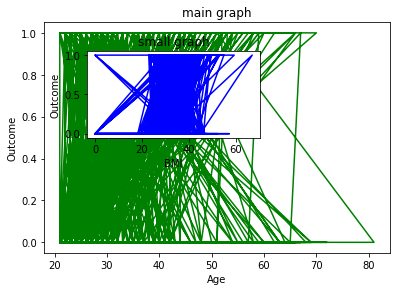

In [19]:
fig=plt.figure()
axes1=fig.add_axes([0.1,0.1,0.8,0.8])#main axes left,bottom,width,height
axes2=fig.add_axes([0.2,0.5,0.4,0.3])#small graph
axes1.plot(dataset["Age"],dataset["Outcome"],'g')
axes1.set_xlabel('Age')
axes1.set_ylabel('Outcome')
axes1.set_title("main graph")
axes2.plot(dataset["BMI"],dataset["Outcome"],'b')
axes2.set_xlabel('BMI')
axes2.set_ylabel('Outcome')
axes2.set_title("small graph")

C:\Users\Jayaprada\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


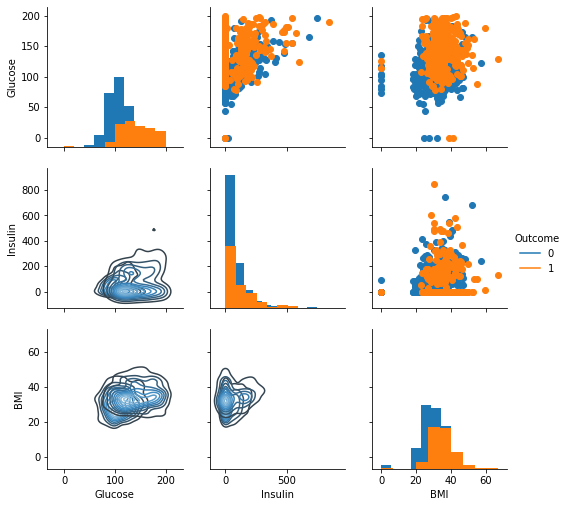

In [20]:
g = sns.PairGrid(dataset, vars=['Glucose', 'Insulin', 'BMI'], hue="Outcome", size=2.4)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.add_legend()
plt.show()

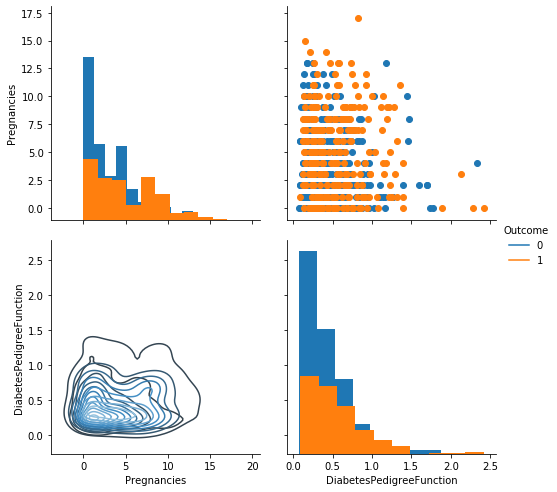

In [21]:
g = sns.PairGrid(dataset, vars=['Pregnancies', 'DiabetesPedigreeFunction'], hue="Outcome", size=3.5)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.add_legend()
plt.show()

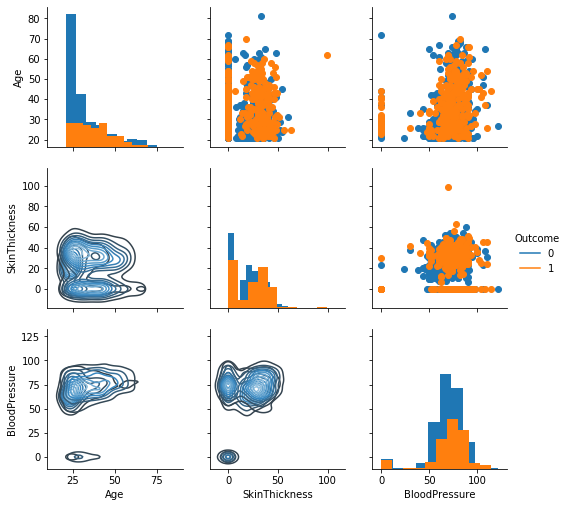

In [22]:
g = sns.PairGrid(dataset, vars=['Age', 'SkinThickness', 'BloodPressure'], hue="Outcome", size=2.4)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.add_legend()
plt.show()

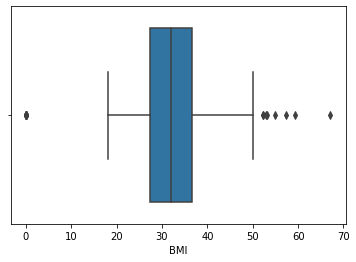

In [23]:
sns.boxplot(dataset["BMI"])

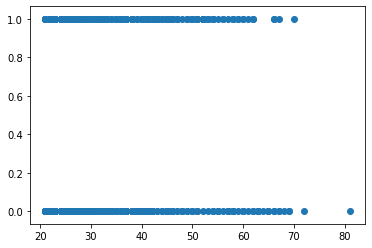

In [24]:
plt.scatter(dataset["Age"],dataset["Outcome"])

In [25]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


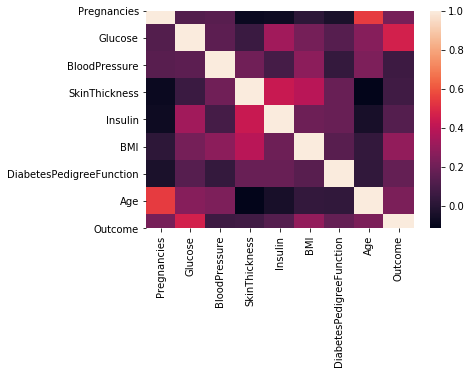

In [26]:
sns.heatmap(dataset.corr())

In [27]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

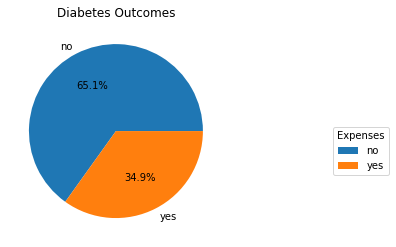

In [28]:
z=[500,268]
label=["no","yes"]
plt.pie(z,labels=label,explode=[0,0],autopct='%1.1f%%')
plt.title("Diabetes Outcomes")
plt.legend(title="Expenses",loc=(1.5,0.3))
plt.show()

Text(0.5, 0, 'diabetes outcomes')

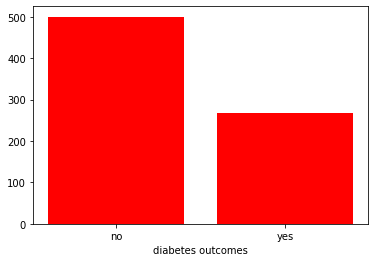

In [29]:
plt.bar(label,z,color='r')
plt.xlabel("diabetes outcomes")

([array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
  array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
  array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
  array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 1., 0., 0.

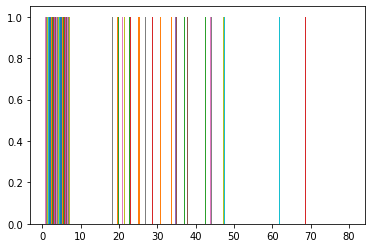

In [30]:
plt.hist(dataset.iloc[:,7:9])

# DATA PREPROCCESING

In [31]:
dataset.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [32]:
def replace_zero(df, field, target):
    mean_by_target = df.loc[df[field] != 0, [field, target]].groupby(target).mean()
    dataset.loc[(df[field] == 0)&(df[target] == 0), field] = mean_by_target.iloc[0][0]
    dataset.loc[(df[field] == 0)&(df[target] == 1), field] = mean_by_target.iloc[1][0]
    
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:   
    replace_zero(dataset, col, 'Outcome')    
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.0,130.287879,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,33.0,206.846154,30.1,0.349,47,1


In [33]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,3.845052,121.697358,72.428141,29.247042,157.003527,32.44642,0.471876,33.240885,0.348958
std,3.369578,30.462008,12.106044,8.923908,88.860914,6.87897,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.50000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,130.287879,32.05000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,206.846154,36.60000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


In [34]:
df=np.abs(stats.zscore(dataset))

In [35]:
threshold=3
np.where(df>threshold)

(array([  4,   8,  13,  18,  43,  45,  57,  58,  88, 106, 111, 120, 123,
        125, 125, 153, 159, 177, 177, 186, 220, 228, 228, 247, 286, 298,
        330, 370, 370, 371, 395, 409, 415, 445, 445, 445, 453, 455, 459,
        486, 549, 579, 584, 593, 597, 621, 645, 655, 666, 673, 684, 691,
        695, 753], dtype=int64),
 array([6, 4, 4, 2, 2, 6, 3, 6, 0, 2, 4, 5, 7, 2, 5, 4, 0, 2, 5, 4, 4, 4,
        6, 4, 4, 0, 6, 4, 6, 6, 6, 4, 4, 3, 5, 6, 7, 0, 7, 4, 2, 3, 4, 6,
        2, 6, 4, 4, 7, 5, 7, 2, 4, 4], dtype=int64))

In [36]:
dataset=dataset[(df<=3).all(axis=1)]
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,206.846154,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,130.287879,26.6,0.351,31,0
2,8,183.0,64.0,33.000000,206.846154,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,27.235457,130.287879,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,130.287879,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,33.000000,206.846154,30.1,0.349,47,1


In [37]:
x=dataset.iloc[:,:-1].values
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [38]:
y=dataset.iloc[:,-1].values
y

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,

In [39]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.66006873,  0.94238214, -0.02696842, ...,  0.22847065,
         0.62981659,  1.51243087],
       [-0.86610174, -1.18362707, -0.55668667, ..., -0.85226688,
        -0.34750028, -0.16859402],
       [ 1.27053692,  2.12349838, -0.73325943, ..., -1.36175743,
         0.78916173, -0.08011902],
       ...,
       [ 0.35483464,  0.03123534, -0.02696842, ..., -0.91402331,
        -0.72284661, -0.25706901],
       [-0.86610174,  0.19996623, -1.08640493, ..., -0.31189812,
        -0.35458228,  1.24700589],
       [-0.86610174, -0.91365765, -0.20354117, ..., -0.26558079,
        -0.47497639, -0.87639397]])

In [40]:
import joblib
joblib.dump(sc,'standardscaler2')

['standardscaler2']

# MODEL BUILDING

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [42]:
x_train.shape

(576, 8)

In [43]:
x_test.shape

(144, 8)

In [44]:
rf_random=RandomForestClassifier(n_estimators=1600,min_samples_split=2,min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)

In [45]:
rf_random.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
joblib.dump(rf_random,'randomforest2.save')

['randomforest2.save']

In [47]:
y_pred=rf_random.predict(x_test)

# MODEL EVALUATION

In [48]:
accuracy_score(y_pred,y_test)

0.8888888888888888

In [49]:
confusion_matrix(y_test,y_pred)

array([[81,  9],
       [ 7, 47]], dtype=int64)

In [50]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.8851851851851852

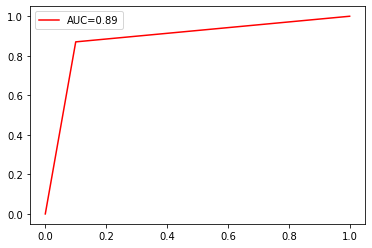

In [51]:
plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='r')
plt.legend()
plt.show()

In [52]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.8545454545454546